Acurácia do modelo SMOT: 0.952984888741282
Relatório de Classificação SMOT:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     24140
           1       0.96      0.94      0.95     24036

    accuracy                           0.95     48176
   macro avg       0.95      0.95      0.95     48176
weighted avg       0.95      0.95      0.95     48176

Acurácia do modelo: 0.9737939973267447
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.47      0.80      0.59       579
           1       1.00      0.98      0.99     24110

    accuracy                           0.97     24689
   macro avg       0.73      0.89      0.79     24689
weighted avg       0.98      0.97      0.98     24689



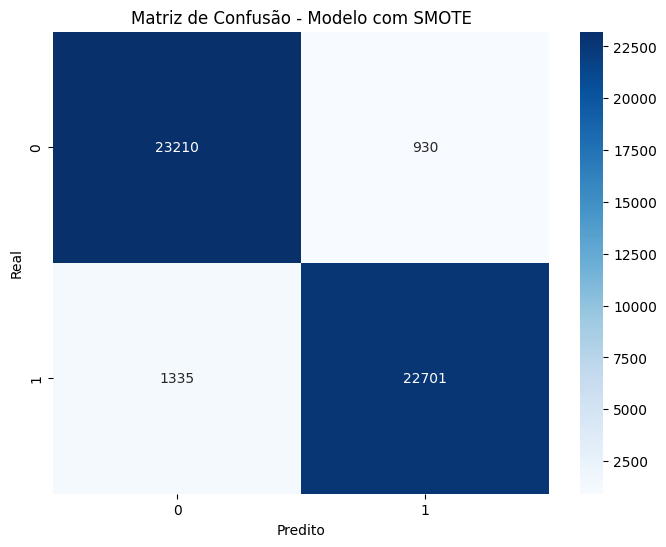

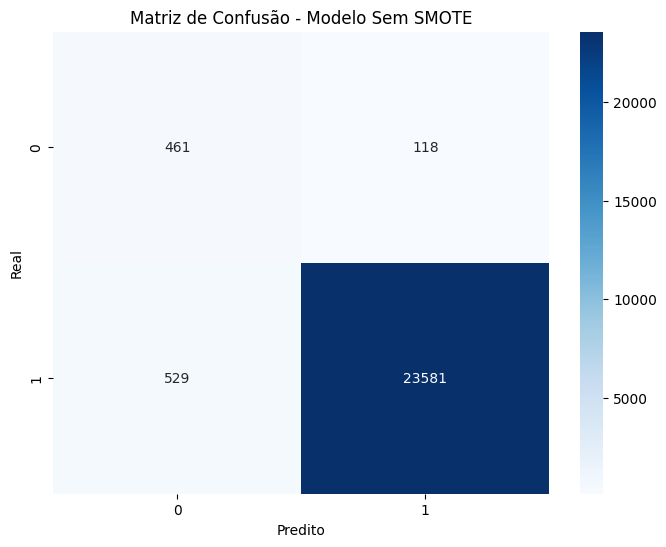

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

def remove_all_outliers(df, column):
    while True:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
        if df_filtered.shape[0] == df.shape[0]:
            break
        else:
            df = df_filtered
    
    return df_filtered

df = pd.read_csv("trabalho_dados_.csv")
df = remove_all_outliers(df, 'distance')
df = remove_all_outliers(df, 'delayed_day_time')

df = pd.get_dummies(df, columns=['customer_seller_is_same_state'], drop_first=True)

X = df[['product_weight_kg', 'product_volume_liters', 'review_score_avg', 'distance', 'due_time_shipped'] +
       [col for col in df.columns if col.startswith('customer_seller_is_same_state_')]]
y = df['due_time_delivered']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train_SMOT, X_test_SMOT, y_train_SMOT, y_test_SMOT = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train_SMOT = scaler.fit_transform(X_train_SMOT)
X_test_SMOT = scaler.transform(X_test_SMOT)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=1000, random_state=42)

rf.fit(X_train_SMOT, y_train_SMOT)
y_pred_SMOT = rf.predict(X_test_SMOT)

y_pred = rf.predict(X_test)

accuracy_SMOT = accuracy_score(y_test_SMOT, y_pred_SMOT)
report_SMOT = classification_report(y_test_SMOT, y_pred_SMOT)

print(f"Acurácia do modelo SMOT: {accuracy_SMOT}")
print("Relatório de Classificação SMOT:")
print(report_SMOT)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Acurácia do modelo: {accuracy}")
print("Relatório de Classificação:")
print(report)

cm_SMOT = confusion_matrix(y_test_SMOT, y_pred_SMOT)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_SMOT, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matriz de Confusão - Modelo com SMOTE')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Matriz de Confusão - Modelo Sem SMOTE')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()